In [1]:
!pip install tensorflow keras numpy mnist matplotlib


In [0]:
import numpy as np
import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential #ANN
from keras.layers import Dense
from keras.utils import to_categorical

In [0]:
train_images = mnist.train_images()
test_images = mnist.test_images()
train_labels = mnist.train_labels()   #means it's value of digits from 0 to 9
test_labels = mnist.test_labels()



In [10]:
#Normalize the pixel values from [0,255] to [-0.5, 0.5]
train_images = (train_images/255) - 0.5
test_images = (test_images/255) - 0.5

#Flatten 28*28 into 784 dimensional vector

train_images = train_images.reshape((-1,784))
test_images = test_images.reshape((-1,784))

print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [0]:
#3 layers, 2 layers with 64 neurons and relu func
#1 layer with 10 neurons and softmax functoin

model = Sequential()
model.add(Dense(64, activation='relu',input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
#loss measure how well the model did on training, and then tries to improve on it using the optimizer 

model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [14]:
#Train

model.fit(train_images,
          to_categorical(train_labels), #like if our label 3 then [0,0,0,1,0,0,0,0,0,0]
          epochs = 5,
          batch_size = 32 #the num of samples per gradient update for training
)

Epoch 1/5
60000/60000 [==============================] - 7s 119us/step - loss: 0.3603 - accuracy: 0.8907
Epoch 2/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.1849 - accuracy: 0.9435
Epoch 3/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.1449 - accuracy: 0.9562
Epoch 4/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.1218 - accuracy: 0.9619
Epoch 5/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.1052 - accuracy: 0.9675


In [15]:
#Evaluate 
model.evaluate(
    test_images,
    to_categorical(test_labels)
)

10000/10000 [==============================] - 1s 55us/step


[0.13361102921888232, 0.9610000252723694]

In [24]:
#model.save_weights('model.h5)
#predict on the first 5 test_images

predictions = model.predict(test_images[:5])
print(predictions)    #5*10 metrics with probability

print("PREDICTED : ",np.argmax(predictions,axis=1))   #axis 1 means means check each row vals to col vals 
print("ACTUAL : ",test_labels[0:5])

[[1.9221192e-05 8.8641414e-08 4.4070352e-05 1.0155745e-05 3.3686927e-08
  1.1372447e-06 1.8078939e-12 9.9979013e-01 6.3048110e-06 1.2889782e-04]
 [3.1833340e-06 1.5614190e-03 9.9794871e-01 4.7594617e-04 1.2170961e-10
  3.1705001e-06 6.8482308e-07 5.0006106e-09 6.9445182e-06 8.6065582e-10]
 [2.4669314e-06 9.9749988e-01 3.8364274e-06 1.9863549e-04 9.1639970e-04
  2.9735444e-05 7.6453352e-06 9.6827338e-04 2.0759198e-05 3.5223507e-04]
 [9.9951971e-01 4.7421310e-07 2.9690715e-04 2.0188961e-06 7.3395256e-07
  2.5827198e-06 6.9374714e-06 2.6829516e-06 2.7207003e-07 1.6760126e-04]
 [1.5664087e-08 2.6476592e-09 4.3935802e-06 4.0590100e-09 9.9977118e-01
  1.4914731e-07 3.6186626e-07 3.7273938e-07 3.9169539e-08 2.2359611e-04]]
PREDICTED :  [7 2 1 0 4]
ACTUAL :  [7 2 1 0 4]


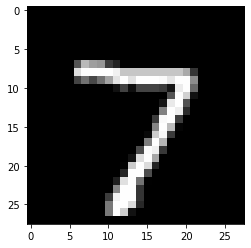

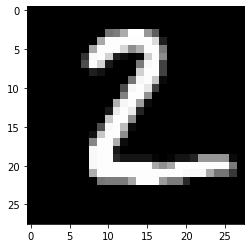

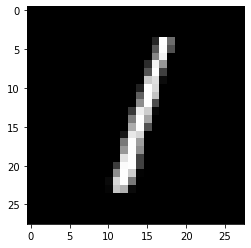

In [29]:
for i in range(3):
  image = test_images[i]
  # image = np.array(image, dtype='float')
  pixels = image.reshape((28,28))
  plt.imshow(pixels, cmap='gray')
  plt.show()